# Phase 2:  Classification Prediction with Imbalanced Target 

# Mary Donovan Martello

**Phase 1 of the credit card default project involved testing five binary classification models for predicting credit card defaults.  Phase 1 can be found:** [here](https://github.com/MaryDonovanMartello/Credit-Card-Default-Prediction)

**Phase 2 of the credit card default project includes (1) employing methodologies other than Principal Component Analysis to address multicollinearity and feature selection in an effort to be able to analyze individual factors that are significant for defaults, (2) testing multiple approaches to addressing an imbalanced target variable in a binary classification model, and (3) implementing deployment models to make actual predictions and convert the logistic regression coefficients to a risk score that can be used in making lending decisions.**

## Part 1:  Exploratory Data Analysis and Data Preparation

**Phase 2 for exploratory data analysis and data preparation looks only at reducing the features with a method other than Principal Component Analysis.  This Phase 2 notebook only includes code for the new Phase 2 analysis.  The EDA for the other features can be found in the link above.**

In [2]:
# import libraries for data preparation and exploration phase
import pandas as pd
from pandas import DataFrame
import numpy as np
# importing regex module (search strings) RegEx can be used to check if a string contains the specified search pattern
import re
#from pandas_profiling import ProfileReport

import yellowbrick
from yellowbrick.features import Rank2D
import matplotlib.pyplot as plt
import seaborn as sn

# import libraries for statistical exploratory analysis
from collections import Counter
import random
import scipy.stats
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import norm

# scaling and feature importance
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_validate
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import FactorAnalysis

#stop unnecessary warnings from printing to the screen
import warnings
warnings.simplefilter('ignore')


### The dataset used for this project includes actual credit card records at points in time in the past. Each record in the dataset also includes a label of whether the account holder defaulted the next month (default = 0) or did not default the next month (default = 1). Each record also includes demographic data of the account holder (age, gender, marital status and education), as well as the account holder’s credit limit, and multiple monthly values of how long the payments are overdue, the debt outstanding, and the amounts of previous payments.

In [3]:
# import data
df = pd.read_csv('UCI_Credit_CardRev.csv')

## Data Cleaning

In [4]:
# print the column names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
# rename difficult column names

df.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'default'}, inplace=True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,63,50000.0,1,1,2,29,2,1,2,1,2,1,24987.0,24300.0,26591.0,25865.0,27667.0,28264.0,0.0,2700.0,0.0,2225.0,1200.0,0.0,1
1,72,320000.0,1,2,2,29,2,1,2,1,2,1,58267.0,59246.0,60184.0,58622.0,62307.0,63526.0,2500.0,2500.0,0.0,4800.0,2400.0,1600.0,1
2,91,200000.0,1,1,1,53,2,1,2,1,2,1,138180.0,140774.0,142460.0,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1
3,105,60000.0,2,2,2,26,2,1,2,1,2,1,56685.0,55208.0,59175.0,60218.0,55447.0,55305.0,0.0,5000.0,2511.0,6.0,3000.0,3000.0,0
4,113,280000.0,1,2,1,41,2,1,2,1,2,1,135673.0,138532.0,134813.0,144401.0,152174.0,149415.0,6500.0,0.0,14254.0,14850.0,0.0,5000.0,0


In [6]:
# rearrange column order
df = df[['ID', 'default', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'LIMIT_BAL', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [7]:
df.head()

,ID,default,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,PAY_1,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,63,1,1,1,2,29,50000.0,2,1,2,...,26591.0,25865.0,27667.0,28264.0,0.0,2700.0,0.0,2225.0,1200.0,0.0
1,72,1,1,2,2,29,320000.0,2,1,2,...,60184.0,58622.0,62307.0,63526.0,2500.0,2500.0,0.0,4800.0,2400.0,1600.0
2,91,1,1,1,1,53,200000.0,2,1,2,...,142460.0,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0
3,105,0,2,2,2,26,60000.0,2,1,2,...,59175.0,60218.0,55447.0,55305.0,0.0,5000.0,2511.0,6.0,3000.0,3000.0
4,113,0,1,2,1,41,280000.0,2,1,2,...,134813.0,144401.0,152174.0,149415.0,6500.0,0.0,14254.0,14850.0,0.0,5000.0


## Feature Selection

**Combine the repayment status columns to one column and change them from categorical to numeric by calculating the number of months the account holder has had delayed payments.**

In [8]:
def monthsLate(row):
    counter = 0
    if row['PAY_1'] > 0:
        counter = counter + 1
    if row['PAY_2'] > 0:
        counter = counter + 1
    if row['PAY_3'] > 0:
        counter = counter + 1
    if row['PAY_4'] > 0:
        counter = counter + 1
    if row['PAY_5'] > 0:
        counter = counter + 1
    if row['PAY_6'] > 0:
        counter = counter + 1
    return counter

In [9]:
# add the new Series to the df
df['MONTHS_LATE'] = df.apply(lambda row: monthsLate(row), axis=1)

In [10]:
df.shape

(30000, 26)

In [11]:
# above the engineered Series was added to the df; now drop the columns that made that Series
df.drop(columns =['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], inplace = True) 
df.shape

(30000, 20)

**More feature engineering for the bill amount and pay amount columns.  Use in a second dataframe for these features so that the first dataframe can still be used.**

In [15]:
# subset dataframe so as to not have records with zero balances in the bill amounts columns
rowsBillsZero = (df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']) != 0
df2 = df.loc[rowsBillsZero, ]
df2.shape

(29130, 20)

In [16]:
df2.columns

Index(['ID', 'default', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'LIMIT_BAL',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'MONTHS_LATE'],
      dtype='object')

**Create a single feature of the ratio of payments made over six months to the outstanding debt for those six months.**

In [17]:
# The proportion of the amount of repayment to the amount for bills for the past six months
df2['PAYMENT_RATIO'] = abs((df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']\
                        +df['PAY_AMT6']))/abs((df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']\
                        +df['BILL_AMT6']))

In [18]:
df2.shape

(29130, 21)

In [19]:
# above the engineered Series was added to the df; now drop the columns that made that Series
df2.drop(columns =['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], inplace = True) 
df2.shape

(29130, 9)

### Data Cleaning cont.

In [19]:
# check data types

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29130 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             29130 non-null  int64  
 1   default        29130 non-null  int64  
 2   SEX            29130 non-null  int64  
 3   EDUCATION      29130 non-null  int64  
 4   MARRIAGE       29130 non-null  int64  
 5   AGE            29130 non-null  int64  
 6   LIMIT_BAL      29130 non-null  float64
 7   MONTHS_LATE    29130 non-null  int64  
 8   PAYMENT_RATIO  29130 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 2.2 MB


In [22]:
# find features with too many nonunique values
distinctList = []
for i in df.columns:
    count = df[i].nunique()
    distinctList.append(count)
    
print(distinctList)

[30000, 2, 2, 7, 4, 56, 81, 22723, 22346, 22026, 21548, 21010, 20604, 7943, 7899, 7518, 6937, 6897, 6939, 7]


In [23]:
# removing ID column as it is just numbering the rows 1 - 30,000
df.drop(columns =['ID'], inplace = True) 
df.shape


(30000, 19)

In [24]:
# removing ID column as it is just numbering the rows 1 - 30,000
df2.drop(columns =['ID'], inplace = True) 
df2.shape

(29130, 8)

### Each record in the dataset includes a label of whether the account holder defaulted the next month (default = 0) or did not default the next month (default = 1). Create separate subsets of the dataset so that one subset only has records that did not have defaults and another subset that only has records that did have defaults. Use these separate subsets for EDA.

In [12]:
# subset for default is 1
rowsYesDefault = df['default'] == 1
defaultY = df.loc[rowsYesDefault, ]
defaultY.shape

(6636, 20)

In [13]:
# subset for default is 0
rowsNoDefault = df['default'] == 0
defaultN = df.loc[rowsNoDefault, ]
defaultN.shape

(23364, 20)

In [20]:
# subset for default is 1
rowsYesDefault2 = df2['default'] == 1
defaultY2 = df2.loc[rowsYesDefault, ]
defaultY2.shape

(6319, 9)

In [21]:
# subset for default is 0
rowsNoDefault2 = df2['default'] == 0
defaultN2 = df2.loc[rowsNoDefault, ]
defaultN2.shape

(22811, 9)

# Exploratory Data Analysis

## Visuals

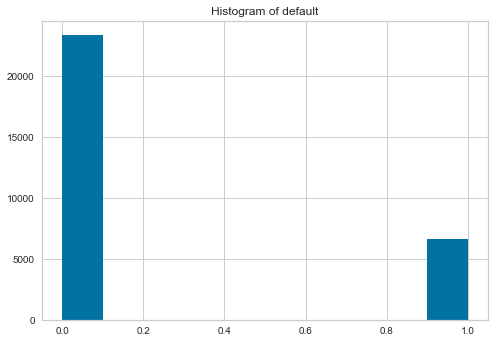

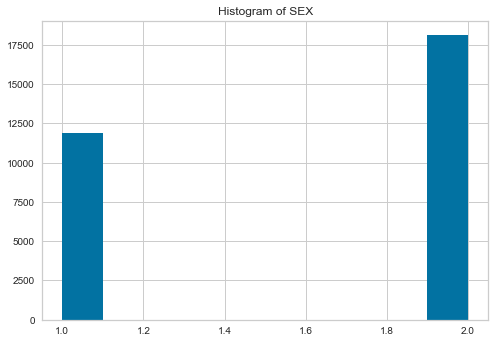

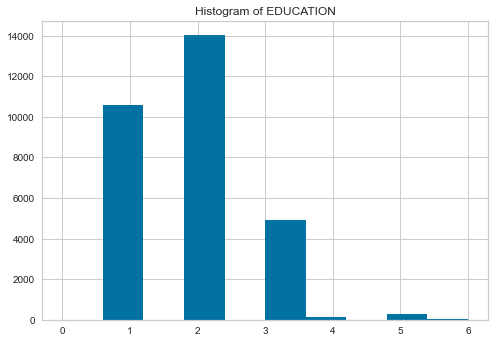

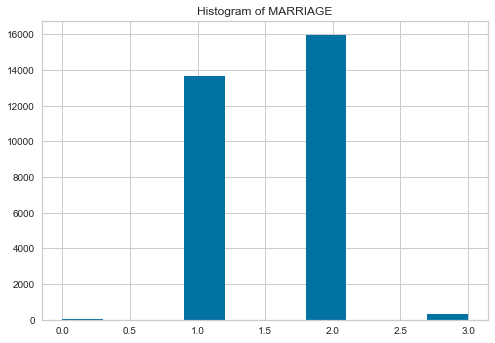

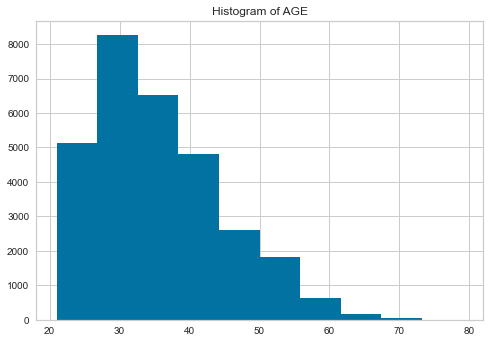

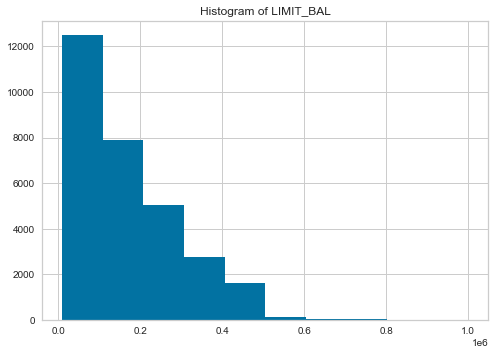

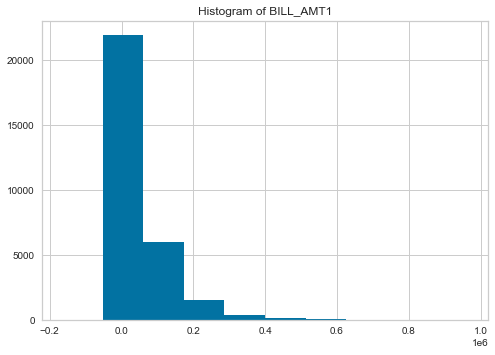

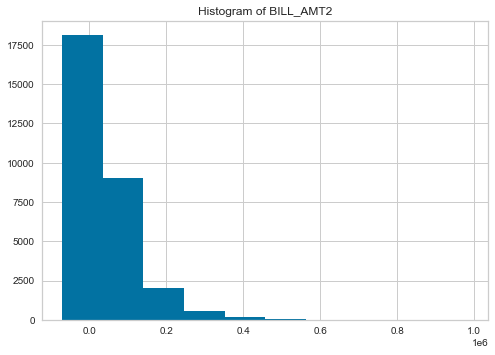

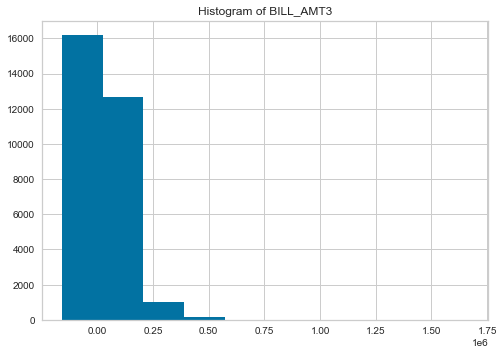

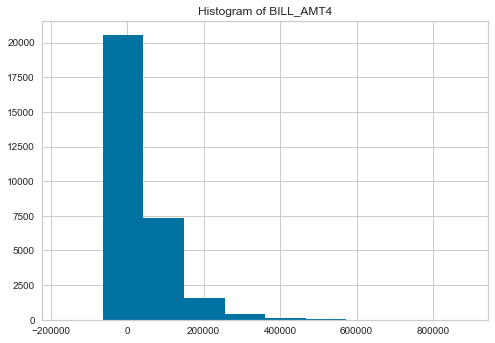

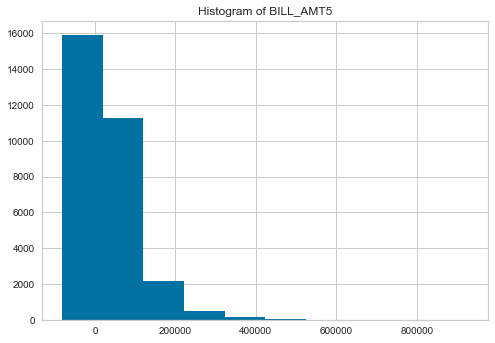

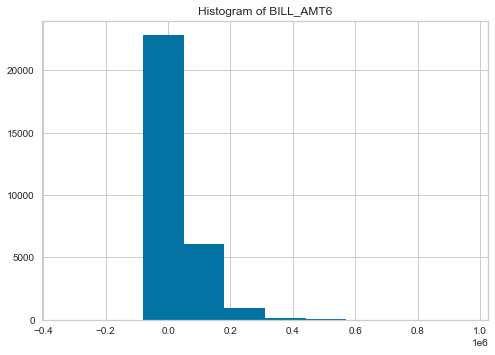

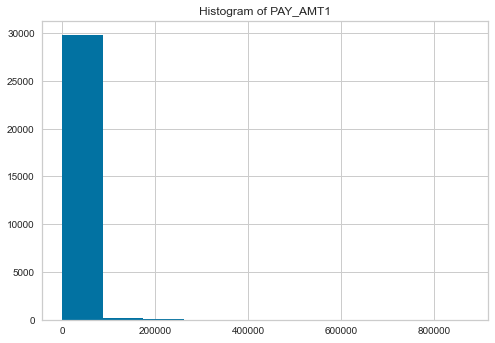

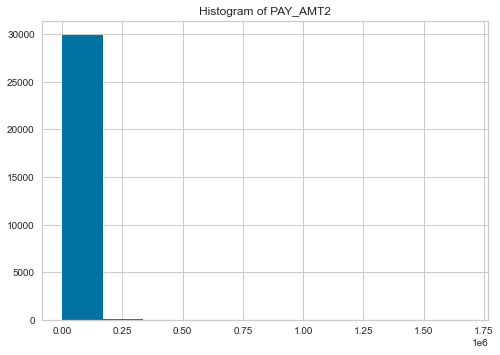

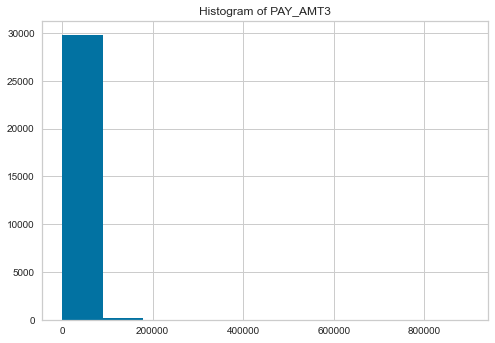

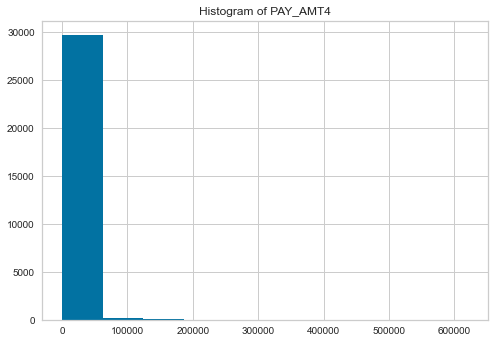

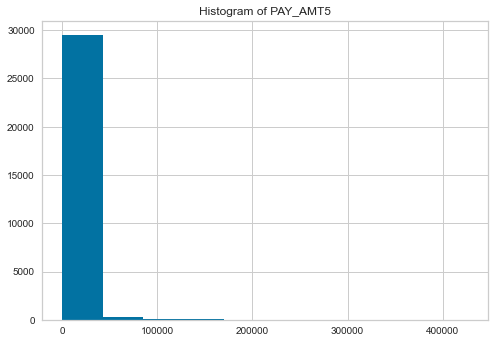

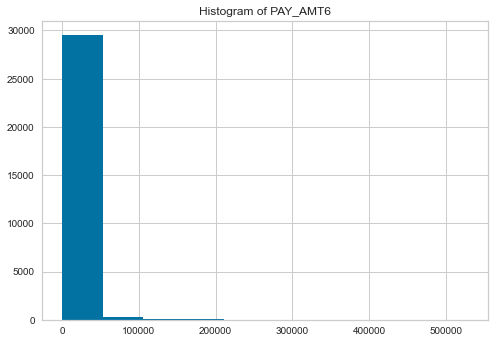

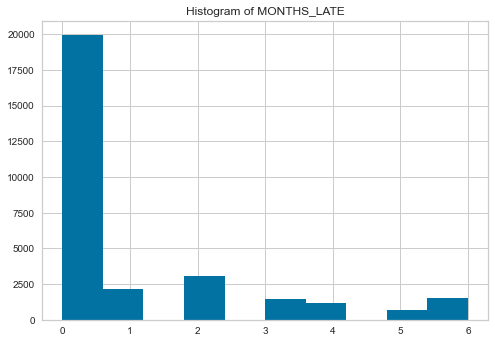

In [33]:
# Plot the histograms of all the variables in the DataFrame.  Plot them all at once using a for loop.  Add unique title.
import matplotlib.pyplot as plt
for i in df:
    df[i].hist()
    plt.title('Histogram of ' + i)
    plt.show()

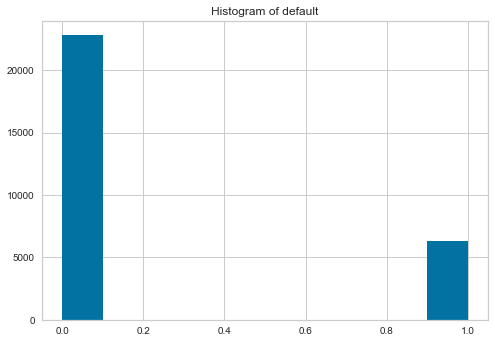

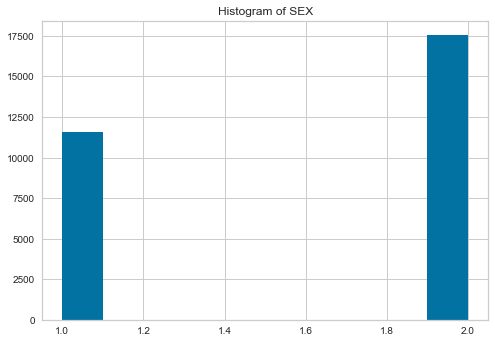

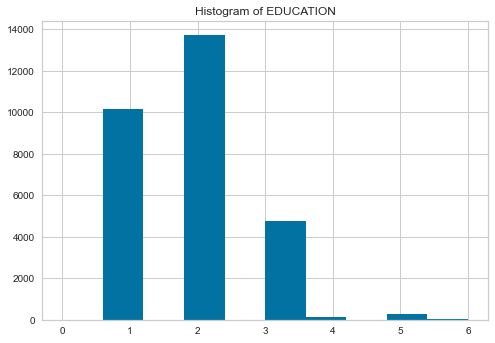

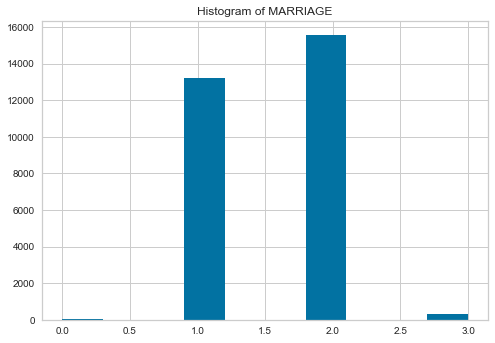

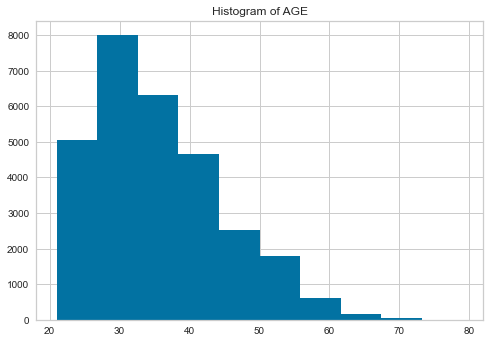

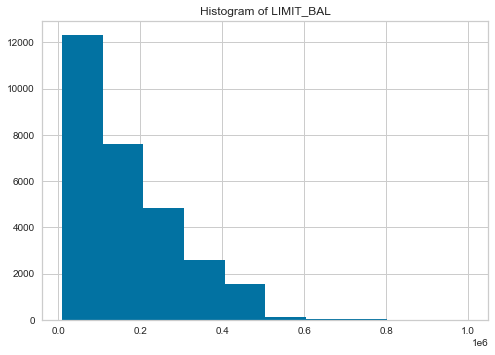

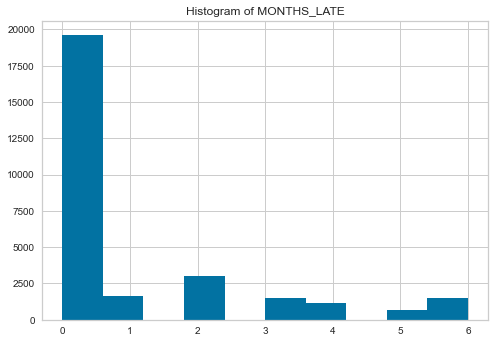

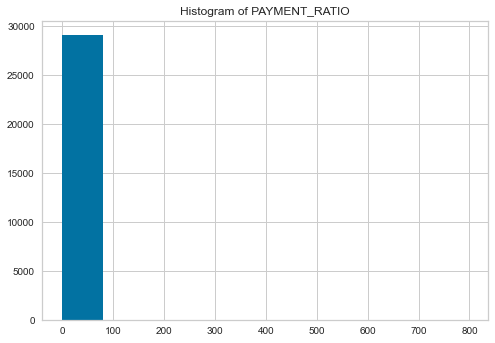

In [34]:
# Plot the histograms of all the variables in the DataFrame.  Plot them all at once using a for loop.  Add unique title.
#import matplotlib.pyplot as plt
for i in df2:
    df2[i].hist()
    plt.title('Histogram of ' + i)
    plt.show()

###  Distribution plots comparing default subset with non-default subset.

Text(0.5, 8.959999999999987, 'Months Late')

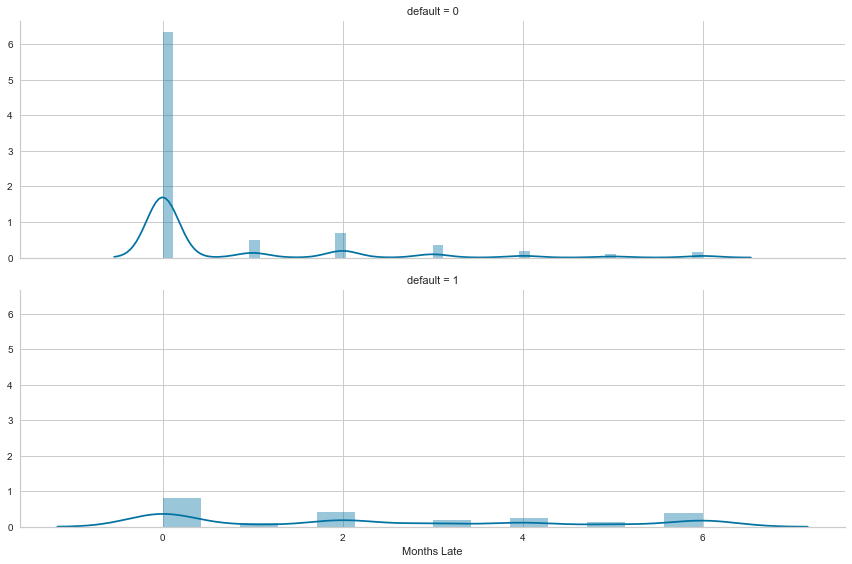

In [35]:
# distribution plots comparing default subset with non-default subsets:  new months_late feature

cl = sn.FacetGrid(df2, row="default", 
                  height=4.0, aspect=3,)
cl.map(sn.distplot, "MONTHS_LATE")
plt.xlabel("Months Late")

**The months late bar chart shows distinction between the default records and the non-default records.  The grey bars for the default subset are higher than the blue bars for the non-default subset in the bars on the right side of X-axis.  These bars on the right side of axis represent a greater number of months being late on payments.  Thus, this chart reveals that even though there are 3.5 times as many non-default records as default records  --- the default bar is still higher than the non-default counts when the payments are 4 and 5 months late.**

Text(0.5, 1.0, 'Compare Months Late')

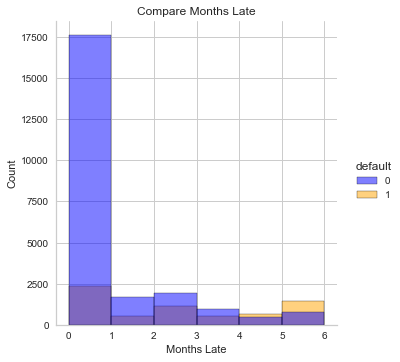

In [24]:
# comparing default subset with non-default subsets: 
#bright=["#003FFF", "#03ED3A", "#E8000B",
#            "#8A2BE2", "#FFC400", "#00D7FF"]
#newPal   = dict(setosa = muted[0], versicolor = muted[2], virginica = muted[1])
#sns.swarmplot(x="measurement", y="value", hue="species", data=iris,palette=newPal )
sn.displot(df, x="MONTHS_LATE", hue="default", bins=6, palette=["blue", "orange"])
plt.xlabel("Months Late")
plt.title("Compare Months Late")


Text(0.5, 8.959999999999987, 'Payment Ratio')

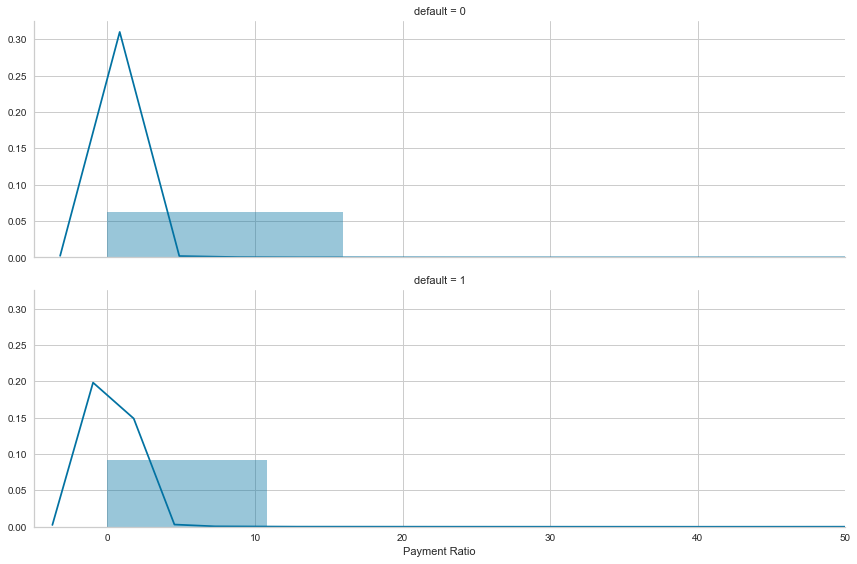

In [155]:
# distribution plots comparing default subset with non-default subsets: payment ratio
cl = sn.FacetGrid(df2, row="default", 
                  height=4.0, aspect=3,)
cl.map(sn.distplot, "PAYMENT_RATIO")
plt.xlim([-5, 50])
plt.xlabel("Payment Ratio")

(-5.0, 5.0)

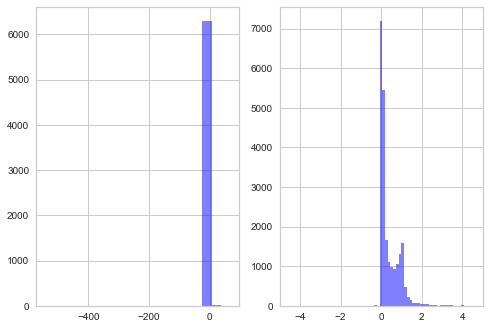

In [148]:
# distribution plots comparing default subset with non-default subsets: payment ratio
plt.figure()
plt.subplot(1, 2, 1)
plt.hist(defaultY3["PAYMENT_RATIO"], bins = 20, facecolor='blue', alpha=0.5)
plt.subplot(1, 2, 2)
plt.xlim([-5, 5])
plt.hist(defaultN3["PAYMENT_RATIO"], bins = 10000, facecolor='blue', alpha=0.5)
plt.xlim([-5, 5])


[Text(0.5, 0, 'Months Late'),
 Text(0, 0.5, 'Proportion'),
 Text(0.5, 1.0, 'Months Late Empirical Cumulative Distribution')]

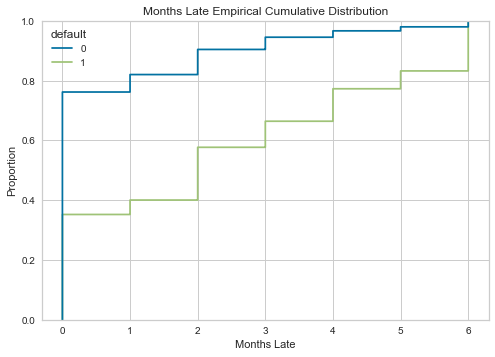

In [37]:
# ECD plots comparing default subset with non-default subsets: Age  
ax = sn.ecdfplot(data=df2, x="MONTHS_LATE", hue="default")
ax.set(xlabel='Months Late', ylabel='Proportion', title='Months Late Empirical Cumulative Distribution')

[Text(0.5, 0, 'Payment Ratio'),
 Text(0, 0.5, 'Proportion'),
 Text(0.5, 1.0, 'Payment Ratio Empirical Cumulative Distribution')]

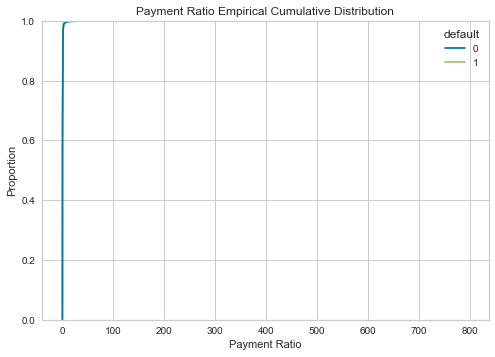

In [161]:
# ECD plots comparing default subset with non-default subsets: Age  
ax = sn.ecdfplot(data=df2, x="PAYMENT_RATIO", hue="default")
ax.set(xlabel='Payment Ratio', ylabel='Proportion', title='Payment Ratio Empirical Cumulative Distribution')

## Descriptive Statistics

In [38]:
# Create new dataset with quantitative variables - full dataset
df_quant = df.filter(['LIMIT_BAL', 'AGE', 'MONTHS_LATE',
       'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'], axis=1)
df_quant.describe()


,LIMIT_BAL,AGE,MONTHS_LATE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,0.996967,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,1.716000,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,0.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,2.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,6.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [40]:
df_quant2 = df2.filter(['LIMIT_BAL', 'AGE', 'MONTHS_LATE', 'PAYMENT_RATIO','default'], axis=1)
df_quant2.describe()

,LIMIT_BAL,AGE,MONTHS_LATE,PAYMENT_RATIO,default
count,29130.000000,29130.000000,29130.000000,29130.000000,29130.000000
mean,166149.319602,35.442911,1.007999,0.574022,0.216924
std,129833.321495,9.207667,1.738166,7.773143,0.412158
min,10000.000000,21.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,0.000000,0.042445,0.000000
50%,140000.000000,34.000000,0.000000,0.094891,0.000000
75%,240000.000000,41.000000,2.000000,0.627543,0.000000
max,1000000.000000,79.000000,6.000000,797.000000,1.000000


## Create correlation visuals to see strength of correlation of each variable with the target "default" variable.

In [41]:
features_quant = [ 'default', 'LIMIT_BAL', 'AGE', 'MONTHS_LATE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

array([[1.0000e+00, 5.0000e+04, 2.9000e+01, ..., 2.2250e+03, 1.2000e+03,
        0.0000e+00],
       [1.0000e+00, 3.2000e+05, 2.9000e+01, ..., 4.8000e+03, 2.4000e+03,
        1.6000e+03],
       [1.0000e+00, 2.0000e+05, 5.3000e+01, ..., 5.5000e+03, 5.0000e+03,
        5.0000e+03],
       ...,
       [0.0000e+00, 1.5000e+05, 4.3000e+01, ..., 1.2900e+02, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 8.0000e+04, 4.1000e+01, ..., 1.9260e+03, 5.2964e+04,
        1.8040e+03],
       [1.0000e+00, 5.0000e+04, 4.6000e+01, ..., 1.0000e+03, 1.0000e+03,
        1.0000e+03]])

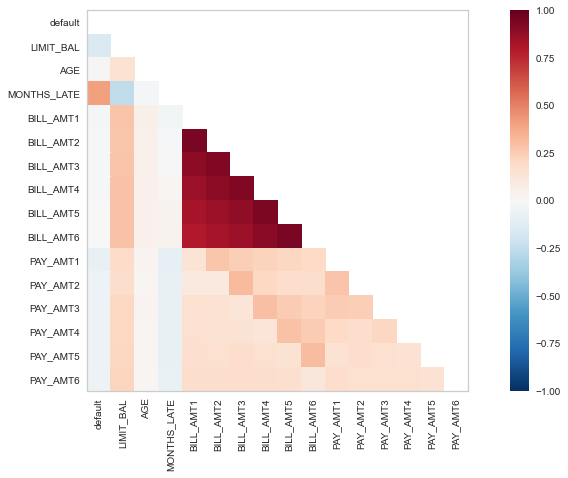

In [42]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X =df[features_quant].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features_quant, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="d://pcoords1.png") # Draw/show/poof the data

array([[1.0000e+00, 5.0000e+04, 2.9000e+01, ..., 2.2250e+03, 1.2000e+03,
        0.0000e+00],
       [1.0000e+00, 3.2000e+05, 2.9000e+01, ..., 4.8000e+03, 2.4000e+03,
        1.6000e+03],
       [1.0000e+00, 2.0000e+05, 5.3000e+01, ..., 5.5000e+03, 5.0000e+03,
        5.0000e+03],
       ...,
       [1.0000e+00, 9.0000e+04, 3.6000e+01, ..., 1.2000e+03, 2.5000e+03,
        0.0000e+00],
       [1.0000e+00, 8.0000e+04, 4.1000e+01, ..., 1.9260e+03, 5.2964e+04,
        1.8040e+03],
       [1.0000e+00, 5.0000e+04, 4.6000e+01, ..., 1.0000e+03, 1.0000e+03,
        1.0000e+03]])

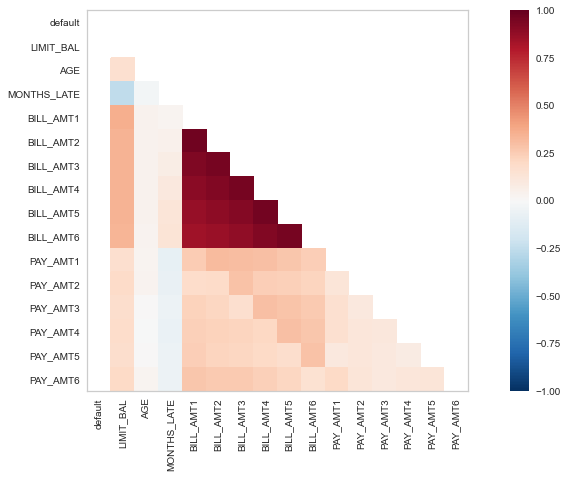

In [43]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X =defaultY[features_quant].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features_quant, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="d://pcoords1.png") # Draw/show/poof the data

array([[0.000e+00, 6.000e+04, 2.600e+01, ..., 6.000e+00, 3.000e+03,
        3.000e+03],
       [0.000e+00, 2.800e+05, 4.100e+01, ..., 1.485e+04, 0.000e+00,
        5.000e+03],
       [0.000e+00, 3.000e+04, 4.100e+01, ..., 0.000e+00, 1.200e+03,
        1.250e+03],
       ...,
       [0.000e+00, 1.000e+05, 3.800e+01, ..., 3.000e+03, 2.000e+03,
        2.000e+03],
       [0.000e+00, 2.200e+05, 3.900e+01, ..., 3.047e+03, 5.000e+03,
        1.000e+03],
       [0.000e+00, 1.500e+05, 4.300e+01, ..., 1.290e+02, 0.000e+00,
        0.000e+00]])

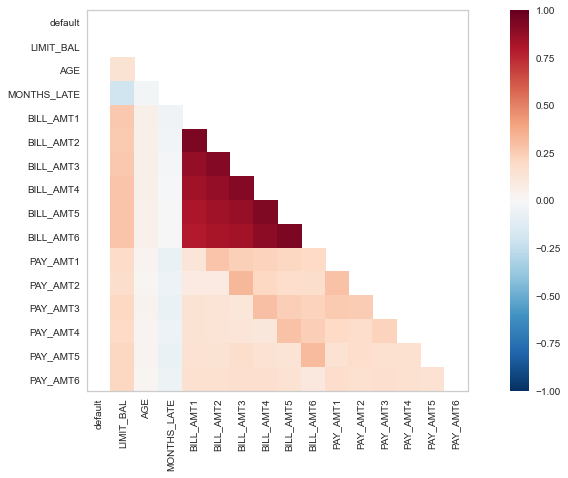

In [44]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X =defaultN[features_quant].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features_quant, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="d://pcoords1.png") # Draw/show/poof the data

In [45]:
features_quant2 = [ 'default', 'LIMIT_BAL', 'AGE', 'MONTHS_LATE', 'PAYMENT_RATIO']

array([[1.00000000e+00, 5.00000000e+04, 2.90000000e+01, 6.00000000e+00,
        3.88459733e-02],
       [1.00000000e+00, 3.20000000e+05, 2.90000000e+01, 6.00000000e+00,
        3.81055468e-02],
       [1.00000000e+00, 2.00000000e+05, 5.30000000e+01, 6.00000000e+00,
        3.80436737e-02],
       ...,
       [0.00000000e+00, 1.50000000e+05, 4.30000000e+01, 0.00000000e+00,
        6.84071381e-01],
       [1.00000000e+00, 8.00000000e+04, 4.10000000e+01, 1.00000000e+00,
        5.52043989e-01],
       [1.00000000e+00, 5.00000000e+04, 4.60000000e+01, 0.00000000e+00,
        3.59849961e-02]])

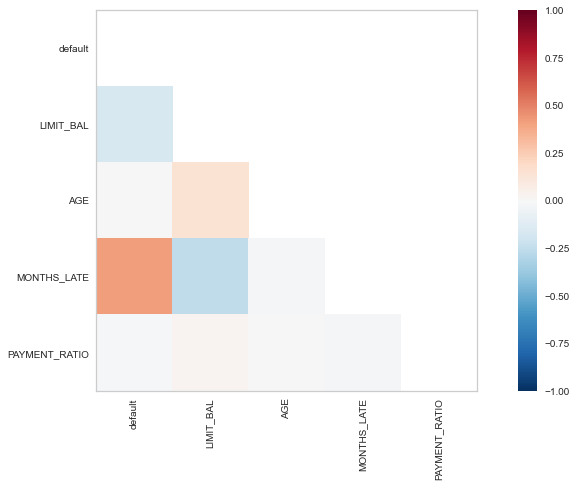

In [46]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X =df2[features_quant2].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features_quant2, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data

array([[1.00000000e+00, 5.00000000e+04, 2.90000000e+01, 6.00000000e+00,
        3.88459733e-02],
       [1.00000000e+00, 3.20000000e+05, 2.90000000e+01, 6.00000000e+00,
        3.81055468e-02],
       [1.00000000e+00, 2.00000000e+05, 5.30000000e+01, 6.00000000e+00,
        3.80436737e-02],
       ...,
       [1.00000000e+00, 9.00000000e+04, 3.60000000e+01, 0.00000000e+00,
        1.26420301e-01],
       [1.00000000e+00, 8.00000000e+04, 4.10000000e+01, 1.00000000e+00,
        5.52043989e-01],
       [1.00000000e+00, 5.00000000e+04, 4.60000000e+01, 0.00000000e+00,
        3.59849961e-02]])

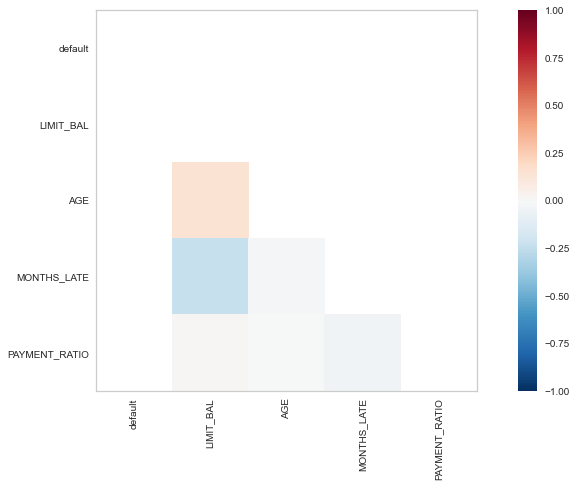

In [47]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X =defaultY2[features_quant2].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features_quant2, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data

array([[0.00000000e+00, 6.00000000e+04, 2.60000000e+01, 6.00000000e+00,
        3.95190008e-02],
       [0.00000000e+00, 2.80000000e+05, 4.10000000e+01, 6.00000000e+00,
        4.74896141e-02],
       [0.00000000e+00, 3.00000000e+04, 4.10000000e+01, 6.00000000e+00,
        5.01242343e-02],
       ...,
       [0.00000000e+00, 1.00000000e+05, 3.80000000e+01, 0.00000000e+00,
        4.12416382e-01],
       [0.00000000e+00, 2.20000000e+05, 3.90000000e+01, 0.00000000e+00,
        5.86614168e-02],
       [0.00000000e+00, 1.50000000e+05, 4.30000000e+01, 0.00000000e+00,
        6.84071381e-01]])

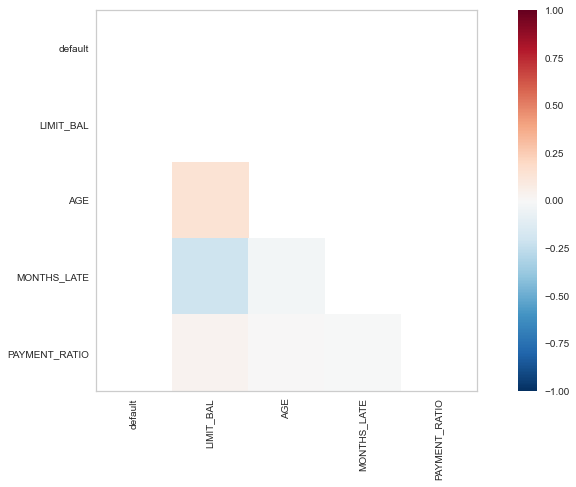

In [48]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X =defaultN2[features_quant2].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features_quant2, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data

**Look at descriptive statistics for separate default subset and non-default subset.**

In [49]:
# Create new dataset with quantitative variables - default is yes
defaultY_quant = defaultY.filter(['LIMIT_BAL', 'AGE', 'MONTHS_LATE',
       'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)
defaultY_quant.describe()

,LIMIT_BAL,AGE,MONTHS_LATE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000
mean,130109.656420,35.725738,2.317661,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068
std,115378.540571,9.693438,2.223813,73782.067220,71651.030364,68516.975738,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894
min,10000.000000,21.000000,0.000000,-6676.000000,-17710.000000,-61506.000000,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,0.000000,2987.750000,2694.000000,2500.000000,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90000.000000,34.000000,2.000000,20185.000000,20300.500000,19834.500000,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000
75%,200000.000000,42.000000,4.000000,59626.500000,57919.750000,54733.750000,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000
max,740000.000000,75.000000,6.000000,613860.000000,581775.000000,578971.000000,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000


In [50]:
# Create new dataset with quantitative variables - default is no
defaultN_quant = defaultN.filter(['LIMIT_BAL', 'AGE', 'MONTHS_LATE',
       'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)
defaultN_quant.describe()

,LIMIT_BAL,AGE,MONTHS_LATE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000
mean,178099.726074,35.417266,0.621854,51994.227273,49717.435670,4.753337e+04,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769
std,131628.359660,9.077355,1.319260,73577.606694,71029.946709,6.957666e+04,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473
min,10000.000000,21.000000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,70000.000000,28.000000,0.000000,3677.250000,3055.000000,2.769750e+03,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000
50%,150000.000000,34.000000,0.000000,23119.500000,21660.500000,2.020250e+04,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000
75%,250000.000000,41.000000,0.000000,69027.000000,65686.000000,6.189400e+04,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000
max,1000000.000000,79.000000,6.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


**Correlation of full dataframe quantitative variables.**

In [51]:
# Create new dataset with quantitative variables - full dataframe
df_quant.corr()

,LIMIT_BAL,AGE,MONTHS_LATE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
LIMIT_BAL,1.000000,0.144713,-0.250876,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
AGE,0.144713,1.000000,-0.020711,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
MONTHS_LATE,-0.250876,-0.020711,1.000000,-0.026984,-0.010613,0.001461,0.019934,0.035142,0.038950,-0.088728,-0.071383,-0.077331,-0.076323,-0.076831,-0.067276,0.410178
BILL_AMT1,0.285430,0.056239,-0.026984,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644
BILL_AMT2,0.278314,0.054283,-0.010613,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256,-0.014193
BILL_AMT3,0.283236,0.053710,0.001461,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326,-0.014076
BILL_AMT4,0.293988,0.051353,0.019934,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637,-0.010156
BILL_AMT5,0.295562,0.049345,0.035142,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184,-0.006760
BILL_AMT6,0.290389,0.047613,0.038950,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494,-0.005372
PAY_AMT1,0.195236,0.026147,-0.088728,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735,-0.072929


In [52]:
# Create new dataset with quantitative variables - full dataframe
df_quant2.corr()

,LIMIT_BAL,AGE,MONTHS_LATE,PAYMENT_RATIO,default
LIMIT_BAL,1.000000,0.141168,-0.251711,0.030463,-0.167660
AGE,0.141168,1.000000,-0.019977,0.004110,0.007203
MONTHS_LATE,-0.251711,-0.019977,1.000000,-0.018773,0.421769
PAYMENT_RATIO,0.030463,0.004110,-0.018773,1.000000,-0.008221
default,-0.167660,0.007203,0.421769,-0.008221,1.000000


**Create subsets to look at highest correlations between different types of variables (address 6 columns for 3 of the variables).**

In [53]:
# Create new dataset with quantitative variables - full dataset
df_quant = df.filter(['LIMIT_BAL', 'AGE', 'MONTHS_LATE',
       'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'], axis=1)

In [54]:
# Create new dataset with selected quantitative variables - full dataset
df_quantSep = df.filter(['LIMIT_BAL', 'AGE', 'MONTHS_LATE', 'BILL_AMT1', 'PAY_AMT1',
        'default'], axis=1)

In [55]:
# Create new dataset with selected quantitative variables - full dataset
df_quantApr = df.filter(['LIMIT_BAL', 'AGE', 'MONTHS_LATE', 'BILL_AMT6', 'PAY_AMT6',
        'default'], axis=1)

In [56]:
# Create new dataset with selected quantitative variables - full dataset
dfY_quantSep = defaultY.filter(['LIMIT_BAL', 'AGE', 'MONTHS_LATE', 'BILL_AMT1', 'PAY_AMT1',
        'default'], axis=1)

In [57]:
# Create new dataset with selected quantitative variables - full dataset
dfN_quantSep = defaultN.filter(['LIMIT_BAL', 'AGE', 'MONTHS_LATE', 'BILL_AMT1', 'PAY_AMT1',
        'default'], axis=1)

In [58]:
# Create new dataset with selected quantitative variables - full dataset
dfY_quantApr = defaultY.filter(['LIMIT_BAL', 'AGE', 'MONTHS_LATE', 'BILL_AMT1', 'PAY_AMT1',
        'default'], axis=1)

In [59]:
# Create new dataset with selected quantitative variables - full dataset
dfN_quantApr = defaultN.filter(['LIMIT_BAL', 'AGE', 'MONTHS_LATE', 'BILL_AMT1', 'PAY_AMT1',
        'default'], axis=1)

In [60]:
df_quant2 = df2.filter(['LIMIT_BAL', 'AGE', 'MONTHS_LATE', 'PAYMENT_RATIO','default'], axis=1)

In [61]:
# get highest correlated pairs
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [62]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df_quantSep, 20))

Top Absolute Correlations
MONTHS_LATE  default        0.410178
LIMIT_BAL    BILL_AMT1      0.285430
             MONTHS_LATE    0.250876
             PAY_AMT1       0.195236
             default        0.153520
             AGE            0.144713
BILL_AMT1    PAY_AMT1       0.140277
MONTHS_LATE  PAY_AMT1       0.088728
PAY_AMT1     default        0.072929
AGE          BILL_AMT1      0.056239
MONTHS_LATE  BILL_AMT1      0.026984
AGE          PAY_AMT1       0.026147
             MONTHS_LATE    0.020711
BILL_AMT1    default        0.019644
AGE          default        0.013890
dtype: float64


In [63]:
print("Top Absolute Correlations for April")
print(get_top_abs_correlations(df_quantApr, 20))

Top Absolute Correlations for April
MONTHS_LATE  default        0.410178
LIMIT_BAL    BILL_AMT6      0.290389
             MONTHS_LATE    0.250876
             PAY_AMT6       0.219595
             default        0.153520
             AGE            0.144713
BILL_AMT6    PAY_AMT6       0.115494
MONTHS_LATE  PAY_AMT6       0.067276
PAY_AMT6     default        0.053183
AGE          BILL_AMT6      0.047613
MONTHS_LATE  BILL_AMT6      0.038950
AGE          MONTHS_LATE    0.020711
             PAY_AMT6       0.019478
             default        0.013890
BILL_AMT6    default        0.005372
dtype: float64


In [64]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(dfY_quantSep, 20))

Top Absolute Correlations
LIMIT_BAL    BILL_AMT1      0.360554
             MONTHS_LATE    0.255759
BILL_AMT1    PAY_AMT1       0.253973
LIMIT_BAL    PAY_AMT1       0.167616
             AGE            0.160025
MONTHS_LATE  PAY_AMT1       0.082514
AGE          BILL_AMT1      0.044896
MONTHS_LATE  BILL_AMT1      0.031034
AGE          PAY_AMT1       0.030329
             MONTHS_LATE    0.027644
LIMIT_BAL    default             NaN
AGE          default             NaN
MONTHS_LATE  default             NaN
BILL_AMT1    default             NaN
PAY_AMT1     default             NaN
dtype: float64


In [65]:
print("Top Absolute Correlations for April")
print(get_top_abs_correlations(dfY_quantApr, 20))

Top Absolute Correlations for April
LIMIT_BAL    BILL_AMT1      0.360554
             MONTHS_LATE    0.255759
BILL_AMT1    PAY_AMT1       0.253973
LIMIT_BAL    PAY_AMT1       0.167616
             AGE            0.160025
MONTHS_LATE  PAY_AMT1       0.082514
AGE          BILL_AMT1      0.044896
MONTHS_LATE  BILL_AMT1      0.031034
AGE          PAY_AMT1       0.030329
             MONTHS_LATE    0.027644
LIMIT_BAL    default             NaN
AGE          default             NaN
MONTHS_LATE  default             NaN
BILL_AMT1    default             NaN
PAY_AMT1     default             NaN
dtype: float64


In [66]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(dfN_quantSep, 20))

Top Absolute Correlations
LIMIT_BAL    BILL_AMT1      0.267728
             MONTHS_LATE    0.202033
             PAY_AMT1       0.192066
             AGE            0.146199
BILL_AMT1    PAY_AMT1       0.125730
MONTHS_LATE  PAY_AMT1       0.069389
AGE          BILL_AMT1      0.060091
MONTHS_LATE  BILL_AMT1      0.046533
AGE          MONTHS_LATE    0.030658
             PAY_AMT1       0.027688
LIMIT_BAL    default             NaN
AGE          default             NaN
MONTHS_LATE  default             NaN
BILL_AMT1    default             NaN
PAY_AMT1     default             NaN
dtype: float64


In [67]:
print("Top Absolute Correlations for April")
print(get_top_abs_correlations(dfN_quantApr, 20))

Top Absolute Correlations for April
LIMIT_BAL    BILL_AMT1      0.267728
             MONTHS_LATE    0.202033
             PAY_AMT1       0.192066
             AGE            0.146199
BILL_AMT1    PAY_AMT1       0.125730
MONTHS_LATE  PAY_AMT1       0.069389
AGE          BILL_AMT1      0.060091
MONTHS_LATE  BILL_AMT1      0.046533
AGE          MONTHS_LATE    0.030658
             PAY_AMT1       0.027688
LIMIT_BAL    default             NaN
AGE          default             NaN
MONTHS_LATE  default             NaN
BILL_AMT1    default             NaN
PAY_AMT1     default             NaN
dtype: float64


In [68]:
print("Top Absolute Correlations for Second Dataframe")
print(get_top_abs_correlations(df_quant2, 20))

Top Absolute Correlations for Second Dataframe
MONTHS_LATE    default          0.421769
LIMIT_BAL      MONTHS_LATE      0.251711
               default          0.167660
               AGE              0.141168
               PAYMENT_RATIO    0.030463
AGE            MONTHS_LATE      0.019977
MONTHS_LATE    PAYMENT_RATIO    0.018773
PAYMENT_RATIO  default          0.008221
AGE            default          0.007203
               PAYMENT_RATIO    0.004110
dtype: float64


**Point-biserial correlation with binary target and continuous variables.**

In [69]:
pbcLIMIT_BAL = stats.pointbiserialr(df.default, df.LIMIT_BAL)
print('Limit Bal: ', pbcLIMIT_BAL)

pbcAGE = stats.pointbiserialr(df.default, df.AGE)
print('Age: ', pbcAGE)

pbcLATE = stats.pointbiserialr(df.default, df.MONTHS_LATE)
print('MONTHS LATE: ', pbcLATE)

pbcRATIO = stats.pointbiserialr(df2.default, df2.PAYMENT_RATIO)
print('RATIO: ', pbcRATIO)


Limit Bal:  PointbiserialrResult(correlation=-0.1535198763935002, pvalue=1.3022439534049927e-157)
Age:  PointbiserialrResult(correlation=0.013889834301963083, pvalue=0.016136845891438788)
MONTHS LATE:  PointbiserialrResult(correlation=0.41017762547934067, pvalue=0.0)
RATIO:  PointbiserialrResult(correlation=-0.00822146718000966, pvalue=0.16056809592422933)


In [106]:
pbcPAY_1 = stats.pointbiserialr(df.default, df.PAY_1)
print(pbcPAY_1)

pbcPAY_2 = stats.pointbiserialr(df.default, df.PAY_2)
print(pbcPAY_2)

pbcPAY_3 = stats.pointbiserialr(df.default, df.PAY_3)
print(pbcPAY_3)

pbcPAY_4 = stats.pointbiserialr(df.default, df.PAY_4)
print(pbcPAY_4)

pbcPAY_5 = stats.pointbiserialr(df.default, df.PAY_5)
print(pbcPAY_5)

pbcPAY_6 = stats.pointbiserialr(df.default, df.PAY_6)
print(pbcPAY_6)


PointbiserialrResult(correlation=0.324793728478616, pvalue=0.0)
PointbiserialrResult(correlation=0.2516560312852095, pvalue=0.0)
PointbiserialrResult(correlation=0.2304638794395602, pvalue=0.0)
PointbiserialrResult(correlation=0.2012543619956233, pvalue=1.0700808338728614e-271)
PointbiserialrResult(correlation=0.19798778821209348, pvalue=7.662079791822927e-263)
PointbiserialrResult(correlation=0.1706733918643573, pvalue=7.307791380213848e-195)


In [107]:
pbcBILL_AMT1 = stats.pointbiserialr(df.default, df.BILL_AMT1)
print(pbcBILL_AMT1)

pbcBILL_AMT2 = stats.pointbiserialr(df.default, df.BILL_AMT2)
print(pbcBILL_AMT2)

pbcBILL_AMT3 = stats.pointbiserialr(df.default, df.BILL_AMT3)
print(pbcBILL_AMT3)

pbcBILL_AMT4 = stats.pointbiserialr(df.default, df.BILL_AMT4)
print(pbcBILL_AMT4)

pbcBILL_AMT5 = stats.pointbiserialr(df.default, df.BILL_AMT5)
print(pbcBILL_AMT5)

pbcBILL_AMT6 = stats.pointbiserialr(df.default, df.BILL_AMT6)
print(pbcBILL_AMT6)



PointbiserialrResult(correlation=-0.01964419714322115, pvalue=0.0006673295491749174)
PointbiserialrResult(correlation=-0.014193218088215446, pvalue=0.013957362393566234)
PointbiserialrResult(correlation=-0.014075518043214523, pvalue=0.014769982711883418)
PointbiserialrResult(correlation=-0.010156495880289523, pvalue=0.07855564158273723)
PointbiserialrResult(correlation=-0.006760463841014679, pvalue=0.24163444293293249)
PointbiserialrResult(correlation=-0.005372314914815476, pvalue=0.3521225212582135)


In [108]:
pbcPAY_AMT1 = stats.pointbiserialr(df.default, df.PAY_AMT1)
print(pbcPAY_AMT1)

pbcPAY_AMT2 = stats.pointbiserialr(df.default, df.PAY_AMT2)
print(pbcPAY_AMT2)

pbcPAY_AMT3 = stats.pointbiserialr(df.default, df.PAY_AMT3)
print(pbcPAY_AMT3)

pbcPAY_AMT4 = stats.pointbiserialr(df.default, df.PAY_AMT4)
print(pbcPAY_AMT4)

pbcPAY_AMT5 = stats.pointbiserialr(df.default, df.PAY_AMT5)
print(pbcPAY_AMT5)

pbcPAY_AMT6 = stats.pointbiserialr(df.default, df.PAY_AMT6)
print(pbcPAY_AMT6)


PointbiserialrResult(correlation=-0.07292948777784954, pvalue=1.1464876143168228e-36)
PointbiserialrResult(correlation=-0.058578706582899764, pvalue=3.1666567630894573e-24)
PointbiserialrResult(correlation=-0.05625035099033063, pvalue=1.8417702916460075e-22)
PointbiserialrResult(correlation=-0.05682740089288609, pvalue=6.830941601927818e-23)
PointbiserialrResult(correlation=-0.05512351562108721, pvalue=1.2413447728790327e-21)
PointbiserialrResult(correlation=-0.053183340326126725, pvalue=3.0335890730065803e-20)


### Address skew with log-transformation.

In [70]:
# log-transformation
# first need to convert values in the PAY and BILL_AMT columns to remove negative values before log_transformation.  
#     Add the largest negative number to all values.

df['BILL_AMT1'] = df['BILL_AMT1'] - df['BILL_AMT1'].min()
df['BILL_AMT2'] = df['BILL_AMT2'] - df['BILL_AMT2'].min()
df['BILL_AMT3'] = df['BILL_AMT3'] - df['BILL_AMT3'].min()
df['BILL_AMT4'] = df['BILL_AMT4'] - df['BILL_AMT4'].min()
df['BILL_AMT5'] = df['BILL_AMT5'] - df['BILL_AMT5'].min()
df['BILL_AMT6'] = df['BILL_AMT6'] - df['BILL_AMT6'].min()


In [71]:
# log-transformation - cont

# now without negative values, can use log_transformation

def log_transformation(data):
    return data.apply(np.log1p)

df['LIMIT_BAL'] = log_transformation(df['LIMIT_BAL'])
df['AGE']  = log_transformation(df['AGE'])
df['MONTHS_LATE'] = log_transformation(df['MONTHS_LATE']) 
df['BILL_AMT1'] = log_transformation(df['BILL_AMT1']) 
df['BILL_AMT2'] = log_transformation(df['BILL_AMT2']) 
df['BILL_AMT3'] = log_transformation(df['BILL_AMT3']) 
df['BILL_AMT4'] = log_transformation(df['BILL_AMT4']) 
df['BILL_AMT5'] = log_transformation(df['BILL_AMT5']) 
df['BILL_AMT6'] = log_transformation(df['BILL_AMT6']) 
df['PAY_AMT1'] = log_transformation(df['PAY_AMT1'])
df['PAY_AMT2'] = log_transformation(df['PAY_AMT2'])
df['PAY_AMT3'] = log_transformation(df['PAY_AMT3'])
df['PAY_AMT4'] = log_transformation(df['PAY_AMT4'])
df['PAY_AMT5'] = log_transformation(df['PAY_AMT5'])
df['PAY_AMT6'] = log_transformation(df['PAY_AMT6'])



In [151]:
# export the revised df to a csv file
df.to_csv('logDefaultRev1.csv', index = False)

In [73]:
df2['LIMIT_BAL'] = log_transformation(df2['LIMIT_BAL'])
df2['AGE']  = log_transformation(df2['AGE'])
df2['MONTHS_LATE'] = log_transformation(df2['MONTHS_LATE'])
df2['PAYMENT_RATIO'] = log_transformation(df2['PAYMENT_RATIO'])

In [152]:
df2.to_csv('logDefaultRev2.csv', index = False)

### Scale Features.

In [75]:
df_quant3 = df.filter(['LIMIT_BAL', 'AGE', 'MONTHS_LATE',
       'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)

In [76]:
df_quant3.shape

(30000, 15)

In [77]:
df_quant4 = df2.filter(['LIMIT_BAL', 'AGE', 'MONTHS_LATE', 'PAYMENT_RATIO'], axis=1)

In [78]:
df_quant4.shape

(29130, 4)

In [79]:
df_quant3 = df_quant3.reset_index()
df_quant4 = df_quant4.reset_index()

In [80]:
from sklearn.preprocessing import StandardScaler
features= StandardScaler().fit_transform(df_quant3)
features2= StandardScaler().fit_transform(df_quant4)

In [81]:
# convert the array back to a dataframe
#from pandas import DataFrame
dfNumm = DataFrame(features, columns=df_quant3.columns)
dfNumm2 = DataFrame(features2, columns=df_quant4.columns)

# Feature Selection

**Create dataframes for feature selection with dummy variables**

In [86]:
#df1
# convert categorical data to numbers

#get the categorical data
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[cat_features]

# One Hot Encoding 
dfDumm = pd.get_dummies(df_cat)

In [87]:
# df1
# here we will combine the numerical features and the dummie features together
#dfNum = df.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'default'], axis = 1)
#Xdumm = pd.concat([dfNum, dfDumm], axis=1)
X1 = pd.concat([dfNumm, dfDumm], axis=1)
# create a whole target dataset that can be used for train and validation data splitting
y1 =  df['default']


In [88]:
X1.shape

(30000, 19)

In [89]:
X1.head()

,index,LIMIT_BAL,AGE,MONTHS_LATE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE
0,-1.731993,-0.895987,-0.676200,2.305401,-0.314778,-0.261852,-0.235947,-0.208691,-0.073707,-0.117278,-2.039844,0.408310,-1.875766,0.479972,0.307415,-1.681626,1,1,2
1,-1.731878,1.076462,-0.676200,2.305401,0.266249,0.442591,0.378440,0.413197,0.660815,0.478054,0.367493,0.384846,-1.875766,0.706266,0.508560,0.409733,1,2,2
2,-1.731762,0.577047,1.727980,2.305401,1.368228,1.534766,1.553315,1.690541,1.895940,1.735769,0.651784,0.625258,0.695442,0.746338,0.721616,0.732579,1,1,1
3,-1.731647,-0.702259,-1.107148,2.305401,0.240647,0.371680,0.361412,0.441173,0.530562,0.344050,-2.039844,0.596194,0.461433,-1.216475,0.573329,0.587826,2,2,2
4,-1.731531,0.934575,0.700047,2.305401,1.338312,1.510892,1.458693,1.694418,1.954135,1.734227,0.661398,-2.001603,0.979702,1.038735,-1.751539,0.732579,1,2,1


In [109]:
colDrop = [0]
X1.drop(X1.columns[colDrop],axis=1,inplace=True)
X1.shape

(30000, 18)

In [91]:
#df2
# convert categorical data to numbers

#get the categorical data
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat2 = df2[cat_features]

# One Hot Encoding 
dfDumm2 = pd.get_dummies(df_cat2)

In [103]:
dfNumm2.head()

,level_0,index,LIMIT_BAL,AGE,MONTHS_LATE,PAYMENT_RATIO
0,0,-1.713097,-0.881906,-0.671063,2.280546,-0.657495
1,1,-1.712982,1.085882,-0.671063,2.280546,-0.659470
2,2,-1.712867,0.587647,1.732119,2.280546,-0.659635
3,3,-1.712752,-0.688636,-1.101833,2.280546,-0.655701
4,4,-1.712637,0.944330,0.704613,2.280546,-0.634541


In [95]:
dfNumm2 = dfNumm2.reset_index()
dfDumm2 = dfDumm2.reset_index()

In [104]:
#df2
# combine the numerical features and the dummie features together
X2 = pd.concat([dfNumm2, dfDumm2], axis=1)
# create a whole target dataset that can be used for train and validation data splitting
y2 =  df2['default']


In [106]:
X2.head()

,level_0,index,LIMIT_BAL,AGE,MONTHS_LATE,PAYMENT_RATIO,index,SEX,EDUCATION,MARRIAGE
0,0,-1.713097,-0.881906,-0.671063,2.280546,-0.657495,0,1,1,2
1,1,-1.712982,1.085882,-0.671063,2.280546,-0.659470,1,1,2,2
2,2,-1.712867,0.587647,1.732119,2.280546,-0.659635,2,1,1,1
3,3,-1.712752,-0.688636,-1.101833,2.280546,-0.655701,3,2,2,2
4,4,-1.712637,0.944330,0.704613,2.280546,-0.634541,4,1,2,1


In [107]:
colsDrop = [0, 1]
X2.drop(X2.columns[colsDrop],axis=1,inplace=True)
X2.shape

(29130, 7)

**ANOVA test and classification models to get feature importance scores**

In [ ]:
# feature selection
#https://medium.com/swlh/feature-importance-hows-and-why-s-3678ede1e58f#:~:text=Features%20with%20a%20p_value%20of,used%20in%20the%20predictive%20model.&text=This%20is%20one%20of%20the,lines%20of%20code%20to%20execute.

Feature:  LIMIT_BAL Score:      -0.22328
Feature:  AGE Score:      0.05555
Feature:  MONTHS_LATE Score:      0.76831
Feature:  BILL_AMT1 Score:      0.06983
Feature:  BILL_AMT2 Score:      0.03896
Feature:  BILL_AMT3 Score:      0.04759
Feature:  BILL_AMT4 Score:      0.07760
Feature:  BILL_AMT5 Score:      -0.03511
Feature:  BILL_AMT6 Score:      -0.02182
Feature:  PAY_AMT1 Score:      -0.09324
Feature:  PAY_AMT2 Score:      -0.06302
Feature:  PAY_AMT3 Score:      -0.07679
Feature:  PAY_AMT4 Score:      -0.05871
Feature:  PAY_AMT5 Score:      -0.04319
Feature:  PAY_AMT6 Score:      -0.06285
Feature:  SEX Score:      -0.09095
Feature:  EDUCATION Score:      -0.06003
Feature:  MARRIAGE Score:      -0.14213


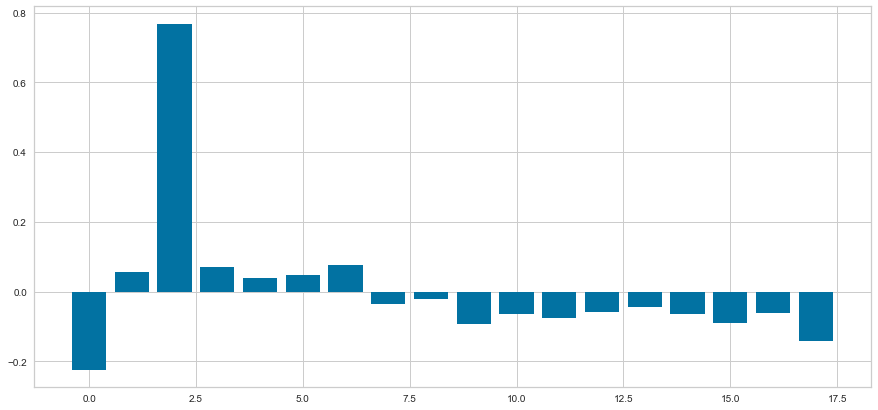

In [110]:
# df1
# look at coefficients only
# define the model
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
# fit the model
model.fit(X1, y1)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
    print('Feature: ', list(X1)[i], 'Score:      %.5f' % (v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Recall this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. 
#The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts 
#class 0.

Feature:  LIMIT_BAL Score:      -0.23199
Feature:  AGE Score:      0.04369
Feature:  MONTHS_LATE Score:      0.85705
Feature:  PAYMENT_RATIO Score:      -0.01274
Feature:  SEX Score:      -0.09924
Feature:  EDUCATION Score:      -0.05612
Feature:  MARRIAGE Score:      -0.16234


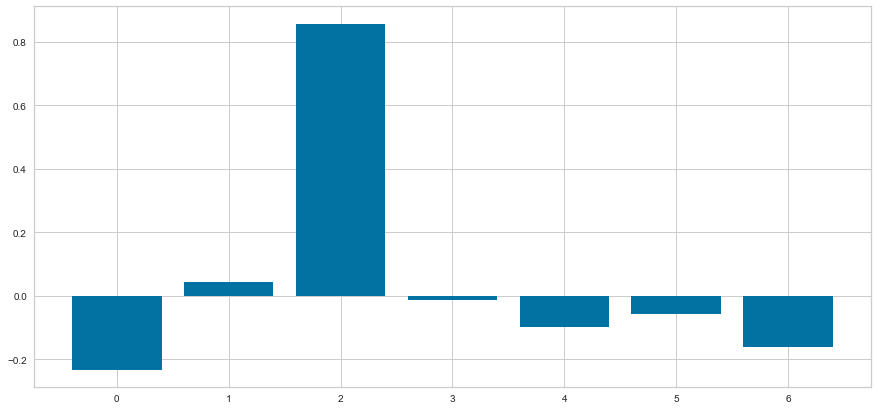

In [111]:
# df2
# look at coefficients only
# define the model
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
# fit the model
model.fit(X2, y2)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
    print('Feature: ', list(X2)[i], 'Score:      %.5f' % (v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


Feature:  LIMIT_BAL Score:      0.05975
Feature:  AGE Score:      0.08104
Feature:  MONTHS_LATE Score:      0.17785
Feature:  BILL_AMT1 Score:      0.07818
Feature:  BILL_AMT2 Score:      0.05046
Feature:  BILL_AMT3 Score:      0.04594
Feature:  BILL_AMT4 Score:      0.04771
Feature:  BILL_AMT5 Score:      0.05149
Feature:  BILL_AMT6 Score:      0.04790
Feature:  PAY_AMT1 Score:      0.05114
Feature:  PAY_AMT2 Score:      0.05263
Feature:  PAY_AMT3 Score:      0.04963
Feature:  PAY_AMT4 Score:      0.05430
Feature:  PAY_AMT5 Score:      0.05204
Feature:  PAY_AMT6 Score:      0.05587
Feature:  SEX Score:      0.01051
Feature:  EDUCATION Score:      0.01998
Feature:  MARRIAGE Score:      0.01359


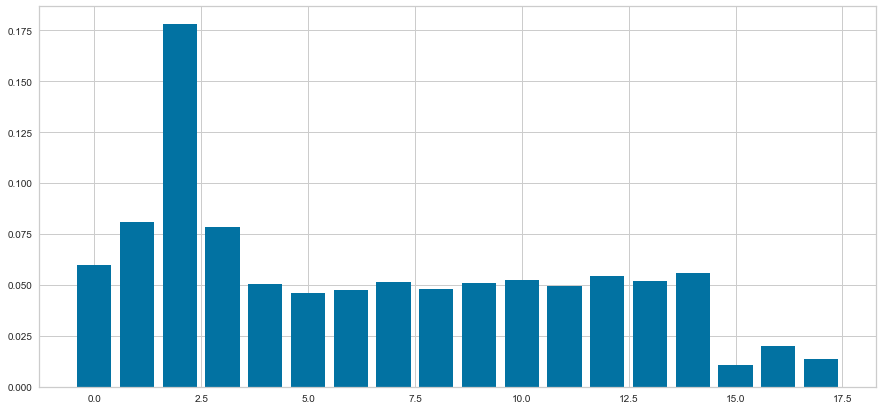

In [112]:
#df1
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# use CART classification feature importance
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X1, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: ', list(X1)[i], 'Score:      %.5f' % (v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()



Feature:  LIMIT_BAL Score:      0.13346
Feature:  AGE Score:      0.18188
Feature:  MONTHS_LATE Score:      0.19513
Feature:  PAYMENT_RATIO Score:      0.39017
Feature:  SEX Score:      0.02678
Feature:  EDUCATION Score:      0.04515
Feature:  MARRIAGE Score:      0.02742


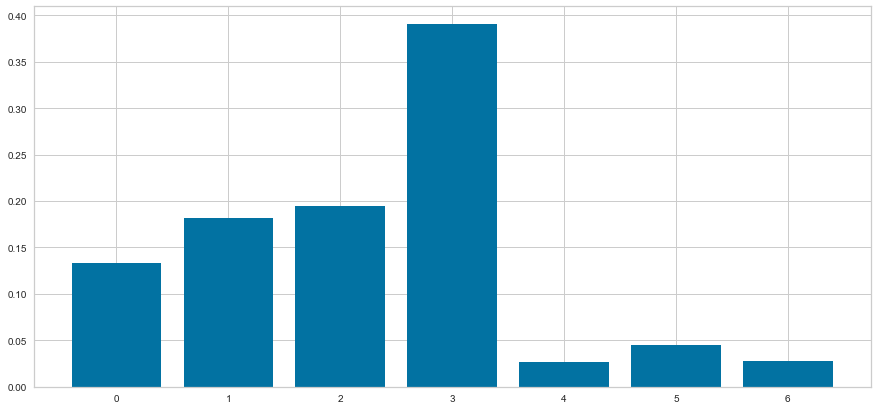

In [113]:
#df2
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# use CART classification feature importance
#from sklearn.tree import DecisionTreeClassifier
#from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X2, y2)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: ', list(X2)[i], 'Score:      %.5f' % (v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature:  LIMIT_BAL Score:      0.06533
Feature:  AGE Score:      0.07254
Feature:  MONTHS_LATE Score:      0.13729
Feature:  BILL_AMT1 Score:      0.06992
Feature:  BILL_AMT2 Score:      0.06428
Feature:  BILL_AMT3 Score:      0.05644
Feature:  BILL_AMT4 Score:      0.05584
Feature:  BILL_AMT5 Score:      0.05400
Feature:  BILL_AMT6 Score:      0.05654
Feature:  PAY_AMT1 Score:      0.06305
Feature:  PAY_AMT2 Score:      0.05792
Feature:  PAY_AMT3 Score:      0.05361
Feature:  PAY_AMT4 Score:      0.05048
Feature:  PAY_AMT5 Score:      0.04659
Feature:  PAY_AMT6 Score:      0.04949
Feature:  SEX Score:      0.01269
Feature:  EDUCATION Score:      0.02012
Feature:  MARRIAGE Score:      0.01388


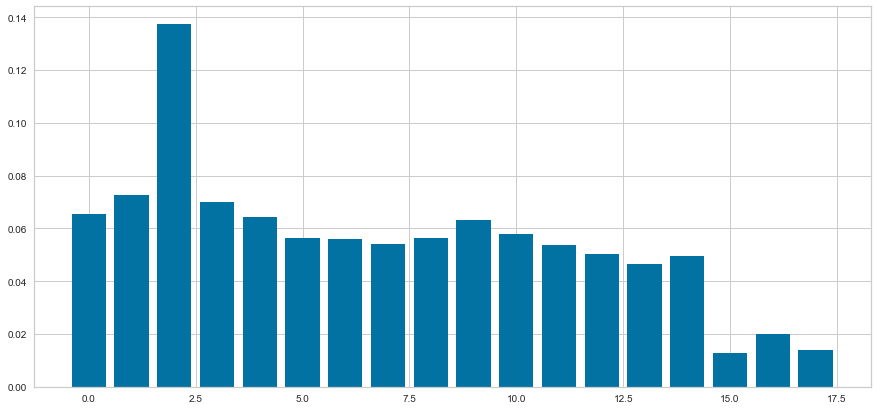

In [114]:
# df1
# use random forest feature importance
# This approach can also be used with the bagging and extra trees algorithms.
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X1, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: ', list(X1)[i], 'Score:      %.5f' % (v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature:  LIMIT_BAL Score:      0.17212
Feature:  AGE Score:      0.19974
Feature:  MONTHS_LATE Score:      0.18516
Feature:  PAYMENT_RATIO Score:      0.37237
Feature:  SEX Score:      0.01634
Feature:  EDUCATION Score:      0.03394
Feature:  MARRIAGE Score:      0.02033


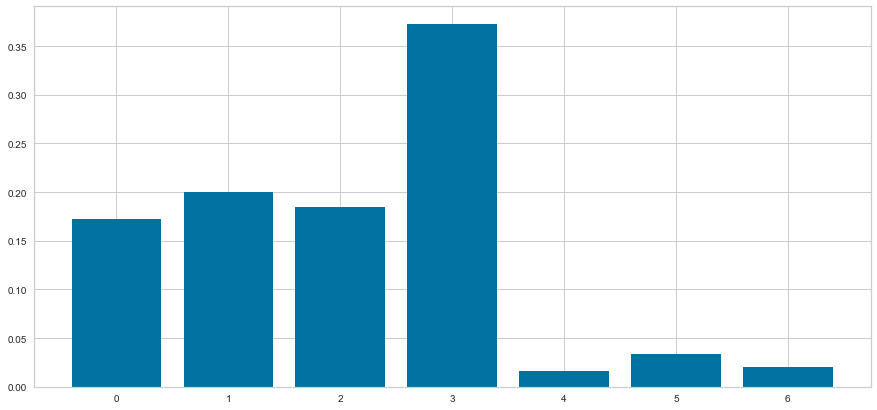

In [115]:
# df2
# use random forest feature importance
# This approach can also be used with the bagging and extra trees algorithms.
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
#from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X2, y2)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: ', list(X2)[i], 'Score:      %.5f' % (v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

[20:02:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature:  LIMIT_BAL Score:      0.03046
Feature:  AGE Score:      0.02226
Feature:  MONTHS_LATE Score:      0.55988
Feature:  BILL_AMT1 Score:      0.03206
Feature:  BILL_AMT2 Score:      0.02749
Feature:  BILL_AMT3 Score:      0.02622
Feature:  BILL_AMT4 Score:      0.02257
Feature:  BILL_AMT5 Score:      0.02497
Feature:  BILL_AMT6 Score:      0.02404
Feature:  PAY_AMT1 Score:      0.02746
Feature:  PAY_AMT2 Score:      0.02919
Feature:  PAY_AMT3 Score:      0.02915
Feature:  PAY_AMT4 Score:      0.02605
Feature:  PAY_AMT5 Score:      0.02327
Feature:  PAY_AMT6 Score:      0.02637
Feature:  SEX Score:      0.02342
Feature:  EDUCATION Score:      0.02431
Feature:  MARRIAGE Score: 

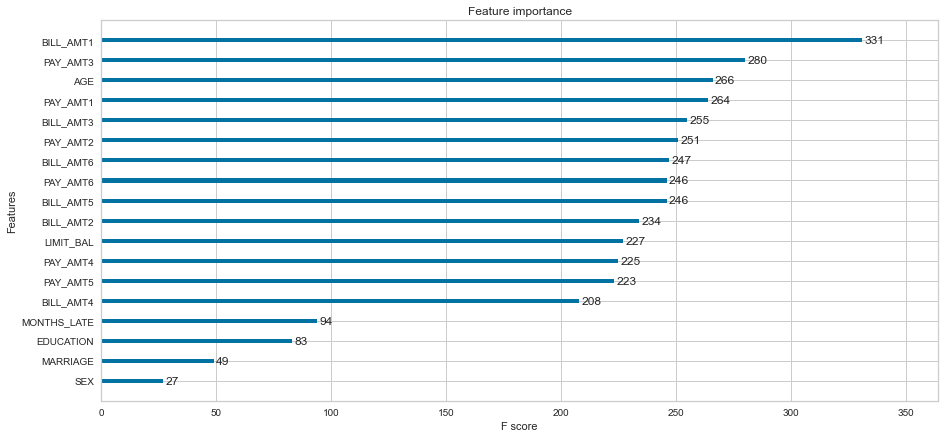

In [116]:
#df1
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# xgboost for feature importance on a classification problem

#from xgboost import XGBClassifier
#from xgboost import plot_importance

# define the model
model = XGBClassifier(random_state = 0)
# fit the model
model.fit(X1, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: ', list(X1)[i], 'Score:      %.5f' % (v))
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

# plot feature importance
plot_importance(model)
plt.show()

[20:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature:  LIMIT_BAL Score:      0.04427
Feature:  AGE Score:      0.03722
Feature:  MONTHS_LATE Score:      0.76410
Feature:  PAYMENT_RATIO Score:      0.04788
Feature:  SEX Score:      0.03560
Feature:  EDUCATION Score:      0.03892
Feature:  MARRIAGE Score:      0.03201


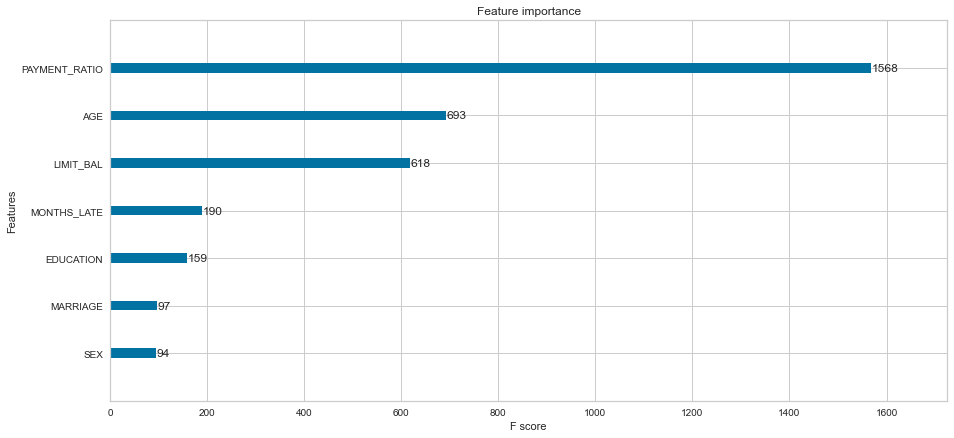

In [117]:
#df2
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# xgboost for feature importance on a classification problem

#from xgboost import XGBClassifier
#from xgboost import plot_importance

# define the model
model = XGBClassifier(random_state = 0)
# fit the model
model.fit(X2, y2)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: ', list(X2)[i], 'Score:      %.5f' % (v))
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

# plot feature importance
plot_importance(model)
plt.show()

In [118]:
def f_score(X, y):
    """
    This function implements the anova f_value feature selection (existing method for classification in scikit-learn),
    where f_score = sum((ni/(c-1))*(mean_i - mean)^2)/((1/(n - c))*sum((ni-1)*std_i^2))

    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    y : {numpy array},shape (n_samples,)
        input class labels

    Output
    ------
    F: {numpy array}, shape (n_features,)
        f-score for each feature
    """

    F, pval = f_classif(X, y)
    for i,v in enumerate(F):
        print('Feature: ', list(X)[i], 'Score:      %.5f' % (v))
    for i,v in enumerate(pval):
        print('Feature: ', list(X)[i], 'pval:      %.5f' % (v))
    
    return F, pval


In [119]:
#df1
f_score(X1, y1)

Feature:  LIMIT_BAL Score:      931.81952
Feature:  AGE Score:      1.72874
Feature:  MONTHS_LATE Score:      5913.47974
Feature:  BILL_AMT1 Score:      15.01126
Feature:  BILL_AMT2 Score:      8.67999
Feature:  BILL_AMT3 Score:      6.79968
Feature:  BILL_AMT4 Score:      3.43250
Feature:  BILL_AMT5 Score:      1.96312
Feature:  BILL_AMT6 Score:      2.93857
Feature:  PAY_AMT1 Score:      895.99261
Feature:  PAY_AMT2 Score:      690.77643
Feature:  PAY_AMT3 Score:      592.72177
Feature:  PAY_AMT4 Score:      484.26328
Feature:  PAY_AMT5 Score:      366.25689
Feature:  PAY_AMT6 Score:      376.62466
Feature:  SEX Score:      47.97885
Feature:  EDUCATION Score:      23.54711
Feature:  MARRIAGE Score:      17.78127
Feature:  LIMIT_BAL pval:      0.00000
Feature:  AGE pval:      0.18858
Feature:  MONTHS_LATE pval:      0.00000
Feature:  BILL_AMT1 pval:      0.00011
Feature:  BILL_AMT2 pval:      0.00322
Feature:  BILL_AMT3 pval:      0.00912
Feature:  BILL_AMT4 pval:      0.06394
Feature

(array([9.31819517e+02, 1.72874286e+00, 5.91347974e+03, 1.50112618e+01,
        8.67999148e+00, 6.79968300e+00, 3.43250202e+00, 1.96312421e+00,
        2.93856542e+00, 8.95992607e+02, 6.90776427e+02, 5.92721767e+02,
        4.84263275e+02, 3.66256892e+02, 3.76624664e+02, 4.79788543e+01,
        2.35471118e+01, 1.77812714e+01]),
 array([1.44696567e-201, 1.88581577e-001, 0.00000000e+000, 1.07098535e-004,
        3.21969761e-003, 9.12192054e-003, 6.39350019e-002, 1.61189928e-001,
        8.64978443e-002, 5.22890930e-194, 1.53951712e-150, 1.16460753e-129,
        1.75914339e-106, 3.72758466e-081, 2.19621370e-083, 4.39524880e-012,
        1.22503803e-006, 2.48536389e-005]))

In [120]:
#df2
f_score(X2, y2)

Feature:  LIMIT_BAL Score:      1056.09891
Feature:  AGE Score:      0.02951
Feature:  MONTHS_LATE Score:      6073.13291
Feature:  PAYMENT_RATIO Score:      271.13193
Feature:  SEX Score:      47.51817
Feature:  EDUCATION Score:      30.75250
Feature:  MARRIAGE Score:      16.41212
Feature:  LIMIT_BAL pval:      0.00000
Feature:  AGE pval:      0.86360
Feature:  MONTHS_LATE pval:      0.00000
Feature:  PAYMENT_RATIO pval:      0.00000
Feature:  SEX pval:      0.00000
Feature:  EDUCATION pval:      0.00000
Feature:  MARRIAGE pval:      0.00005


(array([1.05609891e+03, 2.95132313e-02, 6.07313291e+03, 2.71131930e+02,
        4.75181705e+01, 3.07524996e+01, 1.64121165e+01]),
 array([1.34281830e-227, 8.63600555e-001, 0.00000000e+000, 1.20933581e-060,
        5.56066129e-012, 2.95667222e-008, 5.10904457e-005]))

In [121]:
#df1
#https://stackoverflow.com/questions/55466081/how-to-calculate-feature-importance-in-each-models-of-cross-validation-in-sklear

#from sklearn.model_selection import cross_validate
#from sklearn.ensemble import  RandomForestClassifier


clf=RandomForestClassifier(n_estimators =10, random_state = 42, class_weight="balanced")
output = cross_validate(clf, X1, y1, cv=2, scoring = 'accuracy', return_estimator =True)
for idx,estimator in enumerate(output['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X1.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances.head(20))


Features sorted by their score for estimator 0:
             importance
MONTHS_LATE    0.078694
LIMIT_BAL      0.076349
BILL_AMT1      0.073926
PAY_AMT3       0.072947
AGE            0.072368
PAY_AMT1       0.062345
PAY_AMT2       0.060689
BILL_AMT2      0.060415
PAY_AMT6       0.059648
BILL_AMT3      0.058304
PAY_AMT4       0.057824
BILL_AMT4      0.056711
BILL_AMT5      0.054847
BILL_AMT6      0.053740
PAY_AMT5       0.050001
EDUCATION      0.023430
MARRIAGE       0.014936
SEX            0.012828
Features sorted by their score for estimator 1:
             importance
MONTHS_LATE    0.433798
BILL_AMT2      0.046457
LIMIT_BAL      0.045245
PAY_AMT1       0.043747
BILL_AMT1      0.043539
PAY_AMT2       0.042149
BILL_AMT6      0.040441
BILL_AMT3      0.040391
BILL_AMT5      0.039620
BILL_AMT4      0.036690
PAY_AMT3       0.036015
AGE            0.033354
PAY_AMT6       0.033275
PAY_AMT4       0.031412
PAY_AMT5       0.029812
EDUCATION      0.010979
MARRIAGE       0.007012
SEX            0

In [122]:
#df2
#https://stackoverflow.com/questions/55466081/how-to-calculate-feature-importance-in-each-models-of-cross-validation-in-sklear

#from sklearn.model_selection import cross_validate
#from sklearn.ensemble import  RandomForestClassifier


clf=RandomForestClassifier(n_estimators =10, random_state = 42, class_weight="balanced")
output = cross_validate(clf, X2, y2, cv=2, scoring = 'accuracy', return_estimator =True)
for idx,estimator in enumerate(output['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X2.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances.head(20))


Features sorted by their score for estimator 0:
               importance
PAYMENT_RATIO    0.383979
AGE              0.214255
LIMIT_BAL        0.197614
MONTHS_LATE      0.111234
EDUCATION        0.052099
MARRIAGE         0.026345
SEX              0.014474
Features sorted by their score for estimator 1:
               importance
MONTHS_LATE      0.475825
PAYMENT_RATIO    0.218457
LIMIT_BAL        0.124147
AGE              0.120161
EDUCATION        0.030531
SEX              0.016142
MARRIAGE         0.014738


**scikit-learn's RFECV to conduct recursive feature elimination using cross-validation.**

In [123]:
#df1

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [125]:
lr = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', class_weight='balanced')
# recursively eliminate features
rfecv = RFECV(estimator=lr, step=1, cv=StratifiedKFold(10), scoring='recall', n_jobs=-1)
rfecv.fit(X1, y1)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=-1, scoring='recall', step=1,
   verbose=0)

In [126]:
rfecv.n_features_

1

In [127]:
rfecv.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [128]:
X1.columns

Index(['LIMIT_BAL', 'AGE', 'MONTHS_LATE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX',
       'EDUCATION', 'MARRIAGE'],
      dtype='object')

In [129]:
rfecv.ranking_

array([ 2, 14,  1,  7, 18,  9, 11, 12, 17,  3, 10,  6,  8, 16, 13,  5, 15,
        4])

In [130]:
np.absolute(rfecv.estimator_.coef_)

array([[0.88030883]])

In [131]:
#df2

In [132]:
lr = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', class_weight='balanced')
# recursively eliminate features
rfecv2 = RFECV(estimator=lr, step=1, cv=StratifiedKFold(10), scoring='recall', n_jobs=-1)
rfecv2.fit(X2, y2)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=-1, scoring='recall', step=1,
   verbose=0)

In [133]:
rfecv2.n_features_

1

In [134]:
rfecv2.support_

array([False, False,  True, False, False, False, False])

In [135]:
X2.columns

Index(['LIMIT_BAL', 'AGE', 'MONTHS_LATE', 'PAYMENT_RATIO', 'SEX', 'EDUCATION',
       'MARRIAGE'],
      dtype='object')

In [136]:
rfecv2.ranking_

array([2, 6, 1, 7, 4, 5, 3])

In [137]:
np.absolute(rfecv2.estimator_.coef_)

array([[0.90118418]])

In [ ]:
rfecv.estimator_.feature_importances_
np.absolute(rfecv.estimator_.coef_)
rfecv.ranking_
rfecv.support_
#https://stackoverflow.com/questions/34703051/score-of-rfecv-in-python-scikit-learn
#https://stackoverflow.com/questions/31059123/scikit-learn-feature-reduction-using-rfecv-and-gridsearch-where-are-the-coeff
#https://stackoverflow.com/questions/51181170/selecting-a-specific-number-of-features-via-sklearns-rfecv-recursive-feature-e

optimal_features = X[:, selector.support_] # selector is a RFECV fitted object
n = 6 # to select top 6 features
feature_ranks = selector.ranking_  # selector is a RFECV fitted object
feature_ranks_with_idx = enumerate(feature_ranks)
sorted_ranks_with_idx = sorted(feature_ranks_with_idx, key=lambda x: x[1])
top_n_idx = [idx for idx, rnk in sorted_ranks_with_idx[:n]]

top_n_features = X[:5, top_n_idx]

**Linear Discriminant Analysis**

In [138]:
#df1
# run baseline with n_components = None to return the ratio of variance explained by every component feature
lda = LinearDiscriminantAnalysis(n_components = None)
features_lda = lda.fit(X1, y1)
# create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_


In [139]:
lda_var_ratios

array([1.])

In [140]:
# calculate how many components are required to get above the threshold of variance explained
def select_n_components(var_ratio, goal_var: float) -> int:
    #set initial variance explained so far
    total_variance = 0.0
    # set initial number of features
    n_components = 0
    #for the explained variance of each feature:
    for explained_variance in var_ratio:
        #add the explained variance to the total
        total_variance += explained_variance
        # add one to the number of components
        n_components += 1
        # if goal level of explained variance is reached
        if total_variance >= goal_var:
            # end the loop
            break
        
    # return the number of components
    return n_components

# run function
select_n_components(lda_var_ratios, 0.95)

1

In [141]:
lda.decision_function(X1)

array([ 1.36070776,  0.56154129,  0.94900053, ..., -2.43326786,
       -1.25960095, -1.96695827])

In [142]:
lda.get_params(deep=True)

{'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [143]:
#df2
# run baseline with n_components = None to return the ratio of variance explained by every component feature
lda2 = LinearDiscriminantAnalysis(n_components = None)
features_lda2 = lda2.fit(X2, y2)
# create array of explained variance ratios
lda_var_ratios2 = lda2.explained_variance_ratio_

In [144]:
lda_var_ratios2

array([1.])

In [145]:
# run function
select_n_components(lda_var_ratios2, 0.95)

1

**Factor Analysis**

In [146]:
#df2
# run baseline with n_components = None to return the ratio of variance explained by every component feature
mfa = FactorAnalysis(n_components = None)
features_mfa = mfa.fit(X1, y1)
# create array of explained variance ratios
mfa_var_ratios = mfa.get_covariance()


In [147]:
# calculate how many components are required to get above the threshold of variance explained
def select_n_components2(var_ratio, goal_var: float) -> int:
    #set initial variance explained so far
    total_variance = 0.0
    # set initial number of features
    n_components = 0
    #for the explained variance of each feature:
    for explained_variance in var_ratio:
        #add the explained variance to the total
        total_variance += explained_variance
        # add one to the number of components
        n_components += 1
        # if goal level of explained variance is reached
        if total_variance.all():
            # end the loop
            break
        
    # return the number of components
    return n_components

In [148]:
# run function
select_n_components2(mfa_var_ratios, 0.95)

1

In [149]:
#df2
# run baseline with n_components = None to return the ratio of variance explained by every component feature
mfa2 = FactorAnalysis(n_components = None)
features_mfa2 = mfa2.fit(X1, y1)
# create array of explained variance ratios
mfa_var_ratios2 = mfa2.get_covariance()

In [150]:
# run function
select_n_components2(mfa_var_ratios2, 0.95)

1